In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from PIL import Image
from pylab import *

#import numpy . plot . image . math

In [ ]:
"""to do: FRAME
- Create Frame of individual line
- append all the Frame of individual line
"""
angle = 5
width = 640
height = 480

def lineC(width,height,angle):
    i=1
    fline = {}
    #fline= np.empty([320,0,2])
    while angle*i < 90:
        theta = angle *i
        tan = math.tan(math.radians(theta))
        lr = np.empty([int(width/2),2],int)
        ll = np.empty([int(width/2),2],int)
        lr[0] = np.array([[int(width/2)-1,height-1]])
        ll[0] = np.array([[int(width/2)-1,height-1]])
        for iter in range(1,int(width/2)):
            for jter in range(0,height):
                test = abs(tan-jter/iter)
                if test<=0.01:
                    #print(str(iter) +' '+ str(480-jter+1))
                    lr[iter] = np.array([int((width)/2+iter-1),(height)-jter-1+1])
                    ll[iter] = np.array([int((width)/2-iter-1),(height)-jter-1+1])
                    break
                else:
                    #if not jter==height-1: continue
                    lr[iter] = np.array([int((width)/2+iter-1),lr[iter-1,1]])
                    ll[iter] = np.array([int((width)/2-iter-1),ll[iter-1,1]])
        #print(lr.shape)
        #fline = np.append(fline,[lr],axis=1)

        fline[str(2*i-1)] = lr
        fline[str(2*i)] = ll
        i = i+1
    return fline

fline = lineC(width,height,angle) 
#print("right line :"+str(len(fline.keys()))+', The size of frame: '+str(np.mean([len(fline[key]) for key in fline.keys()])))
#print("left line :"+str(len(flr.keys()))+', The size of frame: '+str(np.mean([len(flr[key]) for key in flr.keys()])))
#flr['1'].shape

In [ ]:
"""to do: Get Data
- import the image
- get the data from each line
- append each line in on numpy array [row = 320 , col = line]
"""
imagePath = 'image/img14.jpg'
img = np.array(Image.open(imagePath))
def selectData(img,fline):
    data = np.empty([len(fline['1']),0],int)
    for key in fline.keys():
        data = np.append(data,np.array([[img[y,x,2]] for x,y in fline[key]]),axis=1)
    return data

data = selectData(img,fline)


In [ ]:
"""to do: 3-sigma
- calculate s1 and hd position
- calculating the mean and thrid standard
- comparing operation of the thrid standard and hd data
- posistion the error
- appending the posistion and get corrdinate 
"""
s1 = 60
hd = 10
h1 = 3
def findEdge(data,s1,hd,h1):
    BND = np.zeros([1])
    a = 0
    b = s1
    while True:
        segCal = data[a:b,:]
        plusCheck = np.mean(segCal,axis=0) + 3* np.std(segCal,axis=0)
        minusCheck = np.mean(segCal,axis=0) - 3* np.std(segCal,axis=0)
        if(b+hd) > len(data): hd = len(data)-b
        test = data[b-1:b+hd,:]
        checktop = (test > plusCheck)+(test<minusCheck)
        index = np.min(checktop,axis=0)
        tempBND = np.where(index==0,index,index+(b-2))
        BND = np.where(BND==0,tempBND,BND)
        x = [plusCheck,minusCheck,checktop,test,a]
        #if a == 15:
            #print(BND,x)
        a= a+h1
        b= b+h1
        if b >len(data): break
    return BND

BND = findEdge(data,s1,hd,h1)

    


In [ ]:
""" To do : plot the data
"""
for num in range(0,data.shape[1]):
    plt.plot([datas for datas in data[:,num]],'r:')
    plt.plot(int(BND[num]),data[int(BND[num]),num],'b.')
    plt.title(('Line '+str(num+1)))
    print(int(BND[num]))
    plt.show()

In [125]:
"""to do: ploting 
- plot image
- plot lines
- plot error posistion
- plot center
"""
print(BND.shape)
print(len(fline.keys()))
def plotData(img,fline,BND):
    for key in fline.keys():
        imshow(img)
        plt.plot(fline[key][:,0],fline[key][:,1],'k:')
        plt.plot(fline[key][int(BND[int(key)-1]),0],fline[key][int(BND[int(key)-1]),1],'ro')
    plt.show()





(34,)
34


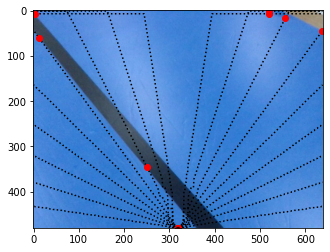

In [136]:
line = lineC(width,height,9)
img = np.array(Image.open('image/img27.jpg'))
data = selectData(img,line)
edge = findEdge(data,70,10,3)
plotData(img,line,edge)

In [138]:
from ImageFrame import Frame
from EdgeFinderV2 import EdgeFinder
from PIL import Image

img = Image.open('image/img21.jpg')

load CVS file successfully


In [142]:
frame1 = Frame(640,480,10)
data = frame1.get_data(img,2)
edge = EdgeFinder(70,3,10,data)

load CVS file successfully


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 18613 and the array at index 1 has size 30485